<a href="https://colab.research.google.com/github/IvanHerreraB-datos/SIniestrosVialesBogot-/blob/main/AnalisisSiniestrosViales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Siniestros Viales en Bogotá D.C.
Siniestros viales (accidentes) ocurridos en Bogotá, desde 2015, con información relacional Actor Vial, Vehicúlos e Hipotesis.


---


**Pregunta de análisis:**  
¿Qué factores temporales y de tipo de actor vial están más asociados a la gravedad de los siniestros viales en Bogotá?

Subpreguntas

1.   ¿En qué horarios se presentan más siniestros graves?
2.   ¿Qué días de la semana concentran más accidentes?
3.   ¿Qué actores viales (peatón, motociclista, conductor) presentan mayor gravedad?
4.   ¿Existen patrones temporales (mensuales/anuales)?

**Fuente:** Datos Abiertos Colombia – Secretaría Distrital de Movilidad

**URL:**
https://www.datos.gov.co/dataset/Siniestros-Viales-Consolidados-Bogot-D-C-/9vzw-xjch/about_data

In [23]:
#Importación de librerías necesarias para el Análisis
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")

In [39]:
#@title Archivo para el Análisis (arrástralo aquí o usa el selector) { run: "auto" }
print("Selecciona el Archivo")
uploaded = files.upload()

# Detectar el primer archivo subido
fname = next(iter(uploaded))
print("Archivo recibido:", fname)

# Data Frames por hojas del archivo, necesarios para el analisis

df = pd.read_excel(io.BytesIO(uploaded[fname]), sheet_name="SINIESTROS", engine="openpyxl")
df_actor = pd.read_excel(io.BytesIO(uploaded[fname]), sheet_name="ACTOR_VIAL", engine="openpyxl")
df_vehiculos = pd.read_excel(io.BytesIO(uploaded[fname]), sheet_name="VEHICULOS", engine="openpyxl")

# Data Frame Unido

df.head()



Selecciona el Archivo


Saving siniestros_viales_consolidados_bogota_dc.xlsx to siniestros_viales_consolidados_bogota_dc (3).xlsx
Archivo recibido: siniestros_viales_consolidados_bogota_dc (3).xlsx


,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2
1,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1
2,4401430,01/01/2015,07:15:00,2,3,NaN,NaN,KR 19D-CL 62 S 02,19,1
3,4401453,01/01/2015,09:30:00,3,1,1.0,NaN,KR 79-CL 42F S 71,8,1
4,4401423,01/01/2015,09:45:00,2,1,1.0,NaN,CL 66A-KR 76 02,10,2


In [41]:
df.info()
df_actor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196152 entries, 0 to 196151
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CODIGO_ACCIDENTE  196152 non-null  int64  
 1   FECHA             196152 non-null  object 
 2   HORA              196152 non-null  object 
 3   GRAVEDAD          196152 non-null  int64  
 4   CLASE             196152 non-null  int64  
 5   CHOQUE            167910 non-null  float64
 6   OBJETO_FIJO       6689 non-null    float64
 7   DIRECCION         196152 non-null  object 
 8   CODIGO_LOCALIDAD  196152 non-null  int64  
 9   DISENO_LUGAR      196152 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 15.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422416 entries, 0 to 422415
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CODIGO_ACCIDENTE    422416 non-null  

# **Analisis Inicial**
---

**Tamaño y cobertura del conjunto de datos**

*   10 variables
*   196.152 registros (dataset manejable)
*   8 COlumnas
*   422416 Registros
---

**Interpretación datos faltantes (no es “error” necesariamente):**

Los valores nulos en variables asociadas al actor vial corresponden a registros donde la información del actor no fue diligenciada. Estos casos se conservan y se agrupan como ‘No especificado’, garantizando la integridad del conteo de siniestros

CHOQUE:
Solo aplica cuando el accidente es un choque.
Los nulos probablemente significan otro tipo de evento (volcamiento, atropello, caída, etc.)

OBJETO_FIJO:
Altísimo porcentaje de nulos.
Indica que solo en pocos accidentes hubo colisión con objeto fijo.

No es una variable general, sino condicional




---


**Para el Objetivo del Análisis es necesario unir las Hojas de la Data inicial (SINIESTROS Y ACTOR_VIAL)**



---



In [42]:
df = df.merge(df_actor, on="CODIGO_ACCIDENTE", how="left")
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422564 entries, 0 to 422563
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CODIGO_ACCIDENTE    422564 non-null  int64  
 1   FECHA_x             422564 non-null  object 
 2   HORA                422564 non-null  object 
 3   GRAVEDAD            422564 non-null  int64  
 4   CLASE               422564 non-null  int64  
 5   CHOQUE              363952 non-null  float64
 6   OBJETO_FIJO         10564 non-null   float64
 7   DIRECCION           422564 non-null  object 
 8   CODIGO_LOCALIDAD    422564 non-null  int64  
 9   DISENO_LUGAR        422564 non-null  int64  
 10  CODIGO_ACCIDENTADO  422416 non-null  float64
 11  FECHA_y             422416 non-null  object 
 12  CONDICION           422416 non-null  object 
 13  ESTADO              422416 non-null  object 
 14  EDAD                422416 non-null  object 
 15  SEXO                422416 non-nul

,0
CODIGO_ACCIDENTE,0
FECHA_x,0
HORA,0
GRAVEDAD,0
CLASE,0
CHOQUE,58612
OBJETO_FIJO,412000
DIRECCION,0
CODIGO_LOCALIDAD,0
DISENO_LUGAR,0


In [45]:
#@title Limpieza y transformación

# Convertir FECHA
df['fecha_evento'] = pd.to_datetime(
    df['FECHA_x'],
    format='%d/%m/%Y',
    errors='coerce'
)

# Variables temporales
df['año'] = df['fecha_evento'].dt.year
df['mes'] = df['fecha_evento'].dt.month

# Día de la semana en español (manual)
dias_es = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df['dia_semana'] = df['fecha_evento'].dt.day_name().map(dias_es)

# Convertir HORA a hora numérica
df['hora_evento'] = pd.to_datetime(
    df['HORA'],
    format='%H:%M:%S',
    errors='coerce'
).dt.hour

# Franja horaria
df['franja_horaria'] = pd.cut(
    df['hora_evento'],
    bins=[0, 6, 12, 18, 24],
    labels=['Madrugada', 'Mañana', 'Tarde', 'Noche'],
    right=False,
    include_lowest=True
)

# Diccionario de Localidades
map_localidad = {
    1: "Usaquén",
    2: "Chapinero",
    3: "Santa Fe",
    4: "San Cristóbal",
    5: "Usme",
    6: "Tunjuelito",
    7: "Bosa",
    8: "Kennedy",
    9: "Fontibón",
    10: "Engativá",
    11: "Suba",
    12: "Barrios Unidos",
    13: "Teusaquillo",
    14: "Los Mártires",
    15: "Antonio Nariño",
    16: "Puente Aranda",
    17: "La Candelaria",
    18: "Rafael Uribe Uribe",
    19: "Ciudad Bolívar",
    20: "Sumapaz"
}



# Diccionario de Gravedad
map_gravedad = {
    1: "Con Muertos",
    2: "Con Heridos",
    3: "Solo Daños"
}

df["gravedad"] = df["GRAVEDAD"].map(map_gravedad)
df["localidad"] = df["CODIGO_LOCALIDAD"].map(map_localidad)
df['CONDICION'] = df['CONDICION'].fillna('No especificado')
df['EDAD'] = df['EDAD'].fillna(-1)
df['SEXO'] = df['SEXO'].fillna('No especificado')
df['VEHICULO'] = df['VEHICULO'].fillna('No aplica')

**ANÁLISIS**

1. ¿En qué horarios se presentan más siniestros graves?

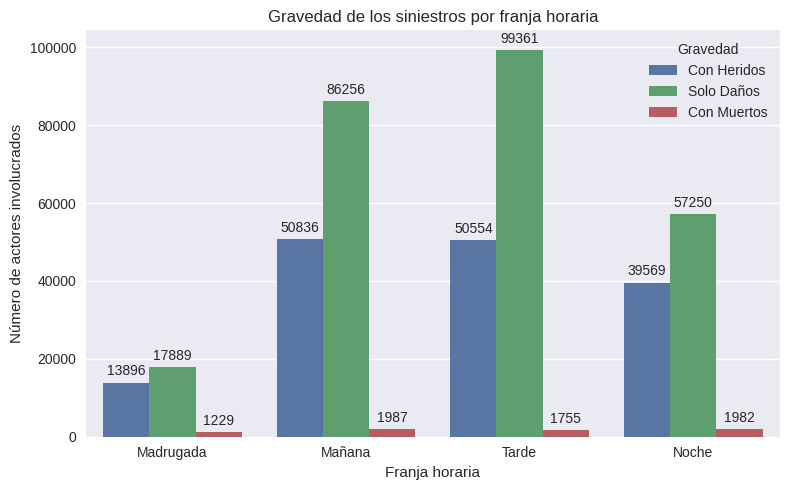

In [46]:
plt.figure(figsize=(8,5))
ax= sns.countplot(
    data=df,
    x="franja_horaria",
    hue="gravedad",
    order=["Madrugada", "Mañana", "Tarde", "Noche"]
)
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')

plt.title("Gravedad de los siniestros por franja horaria")
plt.xlabel("Franja horaria")
plt.ylabel("Número de actores involucrados")
plt.legend(title="Gravedad")
plt.tight_layout()
plt.show()


Los siniestros con mayor gravedad (con muertos y heridos) se concentran principalmente en:

Noche + Madrugada

Posibles causas:

Menor visibilidad,Mayor velocidad, Consumo de alcohol

Aunque en la mañana y tarde ocurre un mayor volumen total de siniestros, estos tienden a ser menos graves (mayor proporción de “Solo daños”).

La noche y la madrugada son los periodos más asociados a siniestros graves, no necesariamente los más frecuentes.

2. ¿Qué días de la semana concentran más accidentes?

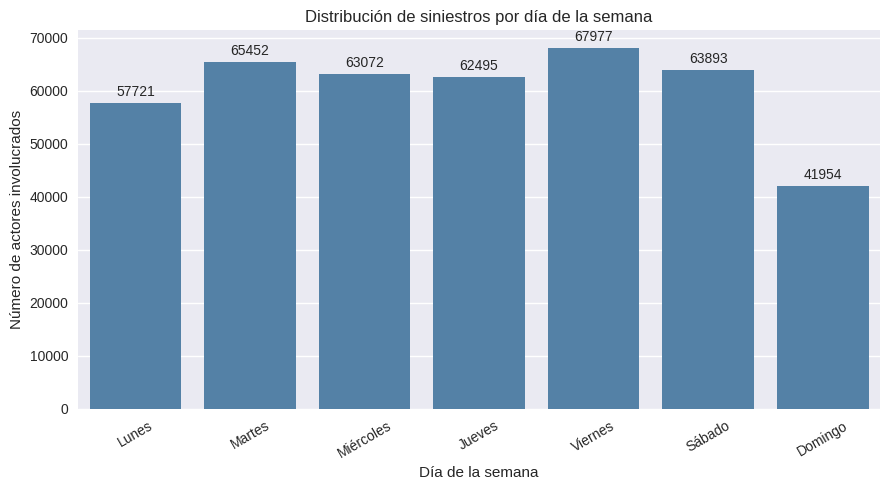

In [47]:
orden_dias = [
    "Lunes", "Martes", "Miércoles",
    "Jueves", "Viernes", "Sábado", "Domingo"
]

plt.figure(figsize=(9,5))
ax = sns.countplot(
    data=df,
    x="dia_semana",
    order=orden_dias,
    color="steelblue"
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')

plt.title("Distribución de siniestros por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de actores involucrados")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Fines de Semana:

Mayor proporción de siniestros

Lunes a jueves son altos:

Mayor volumen asociado a movilidad laboral

Los fines de semana, especialmente viernes y sábado, concentran mas eventos totales que los días hábiles.

3. ¿Qué actores viales presentan mayor gravedad?

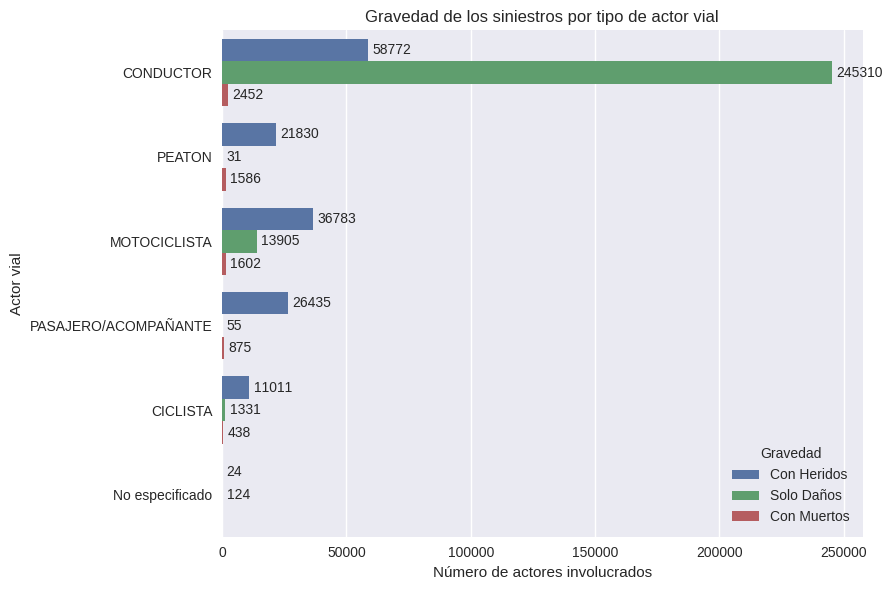

In [48]:
plt.figure(figsize=(9,6))
ax = sns.countplot(
    data=df,
    y="CONDICION",
    hue="gravedad"
)
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')

plt.title("Gravedad de los siniestros por tipo de actor vial")
plt.xlabel("Número de actores involucrados")
plt.ylabel("Actor vial")
plt.legend(title="Gravedad")
plt.tight_layout()
plt.show()

Por severidad relativa:

Peatones
Alta proporción de siniestros con muertos, alta vulnerabilidad física

Motociclistas
Alta participación en siniestros con heridos


Conductores

Mayor volumen total de registros, predominio de siniestros solo con daños


La gravedad no depende solo de la frecuencia, sino de la exposición y vulnerabilidad.
Peatones y motociclistas concentran menor volumen, pero mayor riesgo individual.


Peatones y motociclistas son los actores más asociados a la gravedad, mientras que los conductores concentran eventos menos severos.

4. ¿Existen patrones temporales (mensuales/anuales)?

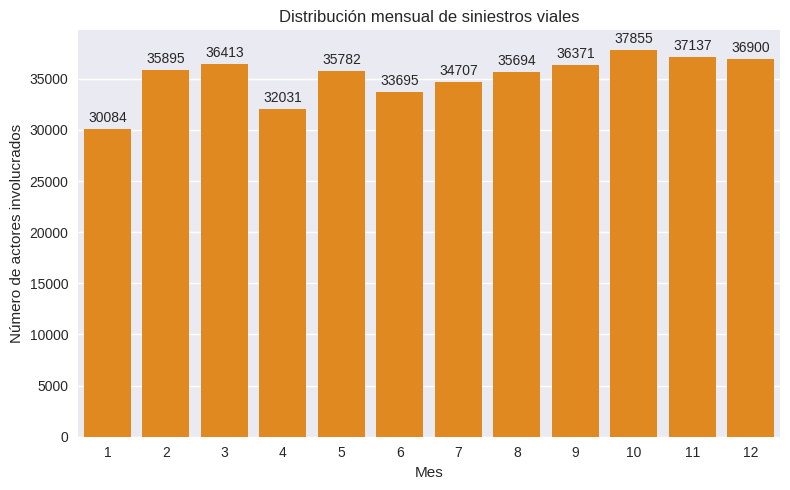

In [50]:
plt.figure(figsize=(8,5))
ax=sns.countplot(
    data=df,
    x="mes",
    color="darkorange"
)
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')

plt.title("Distribución mensual de siniestros viales")
plt.xlabel("Mes")
plt.ylabel("Número de actores involucrados")
plt.tight_layout()
plt.show()

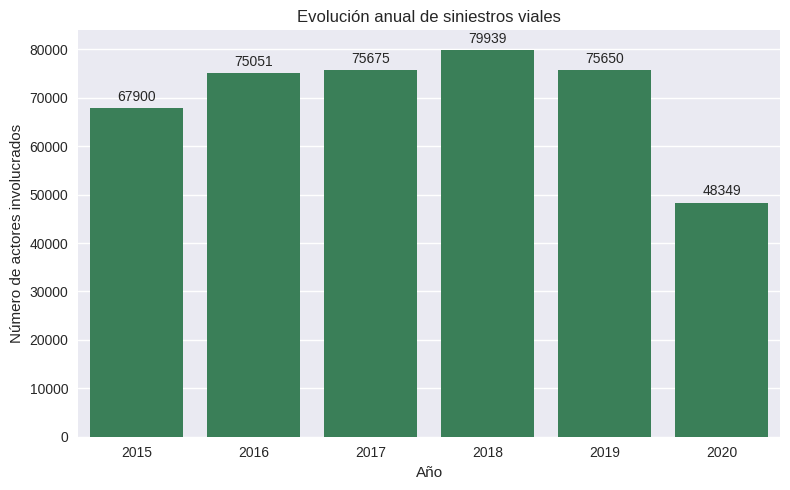

In [51]:
plt.figure(figsize=(8,5))
ax=sns.countplot(
    data=df,
    x="año",
    color="seagreen"
)
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d')
plt.title("Evolución anual de siniestros viales")
plt.xlabel("Año")
plt.ylabel("Número de actores involucrados")
plt.tight_layout()
plt.show()

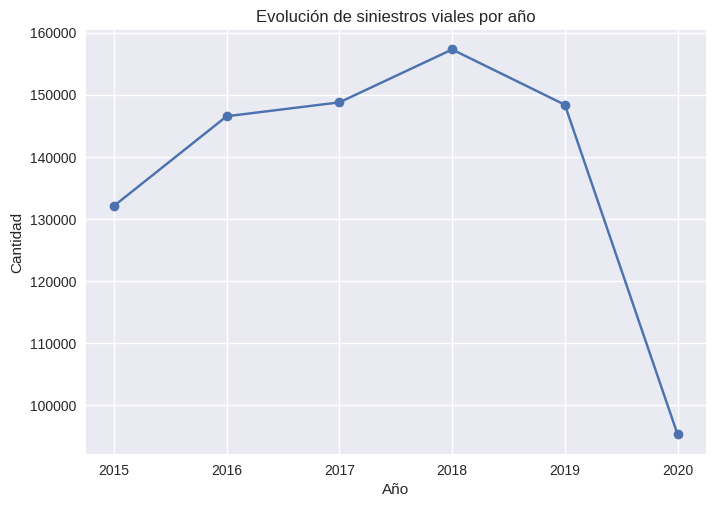

In [ ]:
siniestros_por_año = df.groupby('año').size()

siniestros_por_año.plot(kind='line', marker='o')
plt.title("Evolución de siniestros viales por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

* Patrones anuales

Se observa un patrón estable a lo largo del tiempo:

Los siniestros graves no son eventos aislados
La relación entre actor vial, horario y gravedad se mantiene en los años analizados

* Patrones mensuales
Incrementos relativos en:

Meses asociados a mayor movilidad (fin de año, vacaciones)


Descensos en meses de menor actividad vial

La siniestralidad grave no es aleatoria: responde a patrones temporales repetitivos, lo que permite planificar acciones preventivas focalizadas.

Los siniestros viales más graves en Bogotá están principalmente asociados a:

* Horarios nocturnos y de madrugada
* Fines de semana
* Actores viales vulnerables (peatones y motociclistas)

**Factores temporales**


La noche y la madrugada concentran la mayor proporción de siniestros con muertos y heridos, aun cuando no son los horarios con mayor volumen total.
Esto indica que las condiciones de visibilidad, velocidad, posible consumo de bebidas alcoholicas y control generan escenarios más severos.


Los fines de semana (viernes, sábado y domingo) presentan picos de gravedad, especialmente en la noche. La movilidad recreativa, el consumo de alcohol y la menor regulación aumentan el riesgo.


Se observan patrones mensuales y anuales estables, lo que muestra que la severidad no es aleatoria sino predecible.

**Tipo de actor vial**

Peatones: el actor más vulnerable. Alta proporción de casos con muertos.
Motociclistas: alto volumen de lesionados, tanto entre semana como fin de semana.
Conductores: representan la mayor cantidad de eventos, pero la mayoría con solo daños.
Ciclistas: presentan severidad intermedia, con alta proporción de heridos.

Estos factores interactúan entre sí, aumentando el riesgo cuando coinciden (por ejemplo: peatón + noche + fin de semana).

El análisis evidencia que la gravedad de los siniestros viales en Bogotá está fuertemente asociada a factores temporales y al tipo de actor vial involucrado. Los horarios nocturnos y de madrugada, así como los fines de semana, presentan una mayor proporción de siniestros con heridos y fallecidos, especialmente entre peatones y motociclistas, quienes constituyen los actores más vulnerables del sistema vial.

In [ ]:
df_looker = df[
    ['fecha_evento','año','mes','dia_semana','franja_horaria',
     'CONDICION','gravedad','localidad']
]
df_looker.to_excel('df_completo.xlsx', index=False)

In [53]:
df_looker = df[
    ['fecha_evento','año','mes','dia_semana','franja_horaria',
     'CONDICION','gravedad','localidad']
]
df_looker.to_csv('df_looker.csv', index=False)

In [ ]:
from google.colab import files
files.download('df_completo.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
from google.colab import files
files.download('df_looker.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>